# Mi primera regresión logística

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Importar librerías

In [1]:
from sklearn.datasets import load_digits # Cargar digitos de scikitlearn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.linear_model import LogisticRegression

## Carga de datos

In [3]:
digits = load_digits()

In [13]:
digits.data[0]

array([ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,
        0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,
        0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,
        0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0., 10., 14.,
       13., 16.,  8.,  3.,  0.,  0.,  2., 11., 12., 15., 16., 15.])

In [22]:
image = np.reshape(digits.data[10],(8,8)) # Se cambian las dimensiones porque así lo recomienda la documentación del dataset

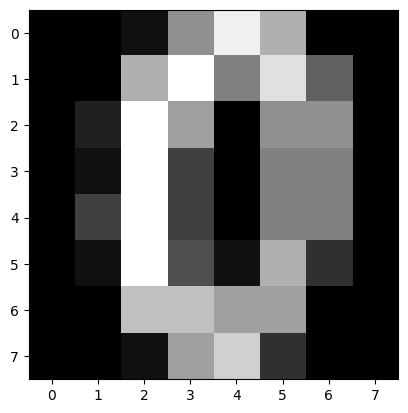

In [23]:
plt.imshow(image,cmap='gray')  # Viusalización imagen

In [24]:
digits.target[10] # Variable objetivo 

0

## Split de datos en train y test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [33]:
print( digits.data.shape)
print(x_train.shape)
print(x_test.shape)
print(digits.target.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 64)
(1437, 64)
(360, 64)
(1797,)
(1437,)
(360,)


## Entrenamiento de modelo

In [36]:
logistic_reg = LogisticRegression(max_iter=10000) # Se recomienda ajustar el máximo de iteraciones para ajustar el modelo
logistic_reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

## Evaluación del modelo

In [38]:
predictions = logistic_reg.predict(x_test)

In [39]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 8, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)


In [44]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]])

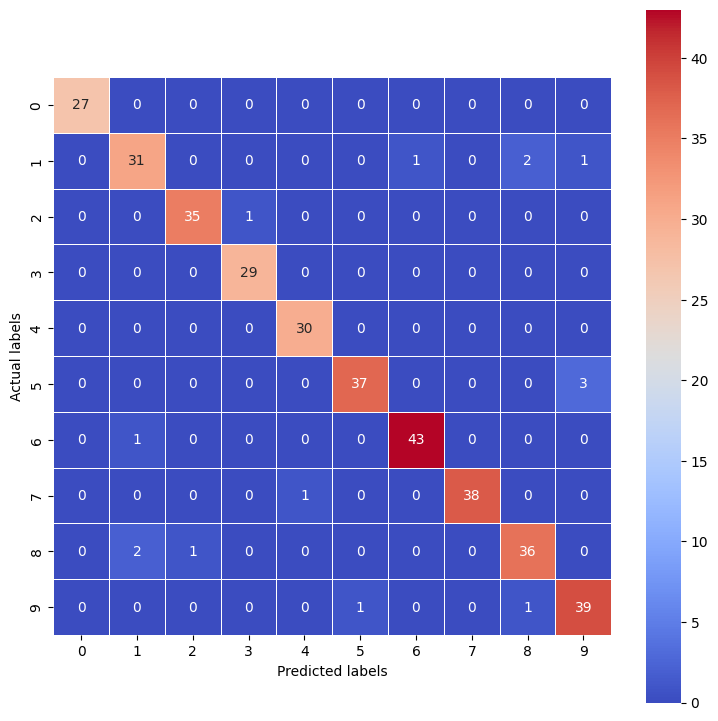

In [52]:
plt.figure(figsize = (9,9))
sns.heatmap(cm,annot=True,linewidth=0.5,square=True,cmap='coolwarm')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()